# Hotel Booking Demand

For my analysis I am going to use the data set that was originally created to understand the demand of Hotel Bookings and also try to predict the result of a booking. This dataset was downloaded from Kaggle. I will review this dataset and use it as part of my analysis for this case study.\
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.\
Kaggle link: https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean, std
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import auc, make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import log_loss, average_precision_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, validation_curve, learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
# Load data into a dataframe
data = pd.read_csv('hotel_bookings.csv')

In [3]:
# Check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (119390, 32)


In [4]:
# Look at the data
print(data.head(5).T)

                                           0             1             2  \
hotel                           Resort Hotel  Resort Hotel  Resort Hotel   
is_canceled                                0             0             0   
lead_time                                342           737             7   
arrival_date_year                       2015          2015          2015   
arrival_date_month                      July          July          July   
arrival_date_week_number                  27            27            27   
arrival_date_day_of_month                  1             1             1   
stays_in_weekend_nights                    0             0             0   
stays_in_week_nights                       0             0             1   
adults                                     2             2             1   
children                                   0             0             0   
babies                                     0             0             0   
meal        

In [5]:
# What type of variables are in the table 
print("Describe Data")
print(data.describe())

Describe Data
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.0000

In [6]:
print("Summarized Data")
print(data.describe(include=['O']))

Summarized Data
             hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  
count        119390        119390             119390                  119390  
unique            3             4                  3                     926  
top      No Deposit     Transient       

**Data Dictionary:**\
*Hotel*: Hotel (H1 = Resort Hotel or H2 = City Hotel)\
*is_canceled*: Value indicating if the booking was canceled (1) or not (0)\
*lead_time*: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date\
*arrival_date_year*: Year of arrival date\
*arrival_date_month*: Month of arrival date\
*arrival_date_week_number*: Week number of year for arrival date\
*arrival_date_day_of_month*: Day of arrival date\
*stays_in_weekend_nights*: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel\
*stays_in_week_nights*: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel\
*adults*: Number of adults\
*children*: Number of children\
*babies*: Number of babies\
*meal*: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)\
*country*: Country of origin. Categories are represented in the ISO 3155–3:2013 format\
*market_segment*: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”\
*distribution_channel*: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”\
*is_repeated_guest*: Value indicating if the booking name was from a repeated guest (1) or not (0)\
*previous_cancellations*: Number of previous bookings that were cancelled by the customer prior to the current booking\
*previous_bookings_not_canceled*: Number of previous bookings not cancelled by the customer prior to the current booking\
*reserved_room_type*: Code of room type reserved. Code is presented instead of designation for anonymity reasons.\
*assigned_room_type*: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.\
*booking_changes*: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation\
*deposit_type*: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.\
*agent*: ID of the travel agency that made the booking\
*company*: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons\
*days_in_waiting_list*: Number of days the booking was in the waiting list before it was confirmed to the customer\
*customer_type*: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking\
*adr*: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights\
*required_car_parking_spaces*: Number of car parking spaces required by the customer\
*total_of_special_requests*: Number of special requests made by the customer (e.g. twin bed or high floor)\
*reservation_status*: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why\
*reservation_status_date*: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel\

In [7]:
# Check if any missing values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# From above, we can see Children, Country, Agent and Company having missing values. 
# For Children we will default the missing values to 0
# For country we will default the missing value to Unknown
# agent: If no agency is given, booking was most likely made without one.
# company: If none given, it was most likely private.
nan_replace = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
hotel_data = data.fillna(nan_replace)

# "meal" contains values "Undefined", which is equal to SC.
hotel_data["meal"].replace("Undefined", "SC", inplace=True)

# Some rows contain entries with 0 adults, 0 children and 0 babies. These are invalid rows and we will drop them.
no_guests = list(hotel_data.loc[hotel_data["adults"]
                   + hotel_data["children"]
                   + hotel_data["babies"]==0].index)
hotel_data.drop(hotel_data.index[no_guests], inplace=True)

In [9]:
# Update the data in is_canceled column, by changing value of 1 to canceled and 0 to not canceled
hotel_data['is_canceled'].replace({1: 'canceled', 0: 'not canceled'}, inplace = True)

In [10]:
# We will now create different dataframes for Resort and City hotel for future analysis.
# To know the actual visitor numbers, only bookings that were not canceled are included. 
resort_hotel = hotel_data.loc[(hotel_data["hotel"] == "Resort Hotel") & (hotel_data["is_canceled"] == "not canceled")]
city_hotel = hotel_data.loc[(hotel_data["hotel"] == "City Hotel") & (hotel_data["is_canceled"] == "not canceled")]

**Part 1 - Graph Analysis**

[Text(0.5, 1.0, 'Hotel distribution based on booking status')]

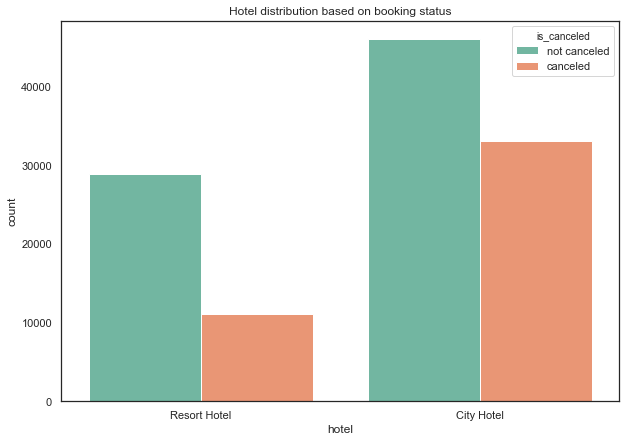

In [11]:
# Bar chart - Hotel distribution based on booking status
plt.rcParams['figure.figsize'] = [10, 7]
sns.set(style = 'white')

dist = sns.countplot(hotel_data['hotel'], hue = 'is_canceled', data = hotel_data, palette = 'Set2');
dist.set(title = "Hotel distribution based on booking status")

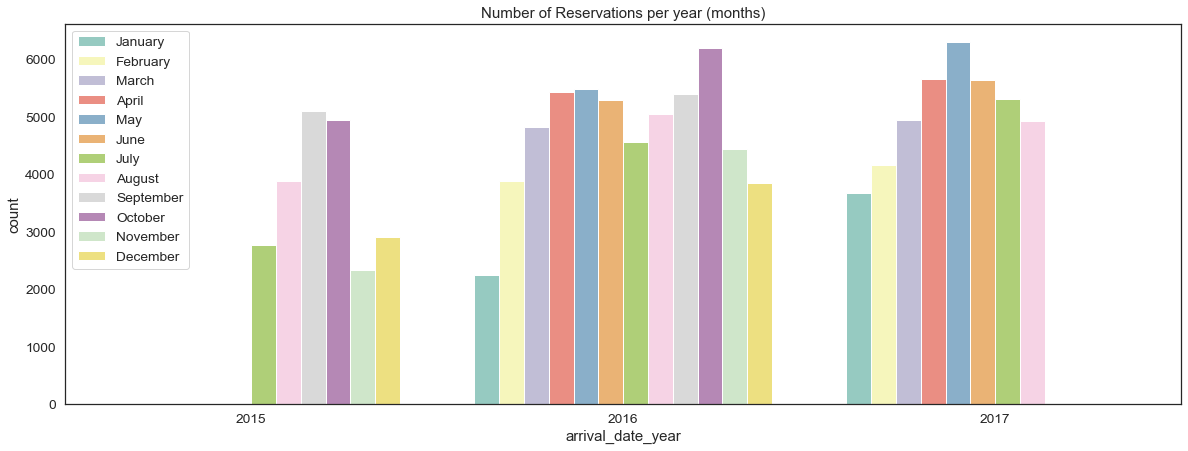

In [12]:
# parameters
plt.rcParams['figure.figsize'] = [20, 7]
sns.set(style = 'white', font_scale = 1.25)

# plot
arrival = sns.countplot(hotel_data['arrival_date_year'], hue = 'arrival_date_month', data = hotel_data, palette = 'Set3',
             hue_order = ['January', 'February', 'March', 'April', 'May', 'June',
                          'July', 'August', 'September', 'October', 'November', 'December'])
arrival.set(title = "Number of Reservations per year (months)")
plt.legend(loc='upper left');

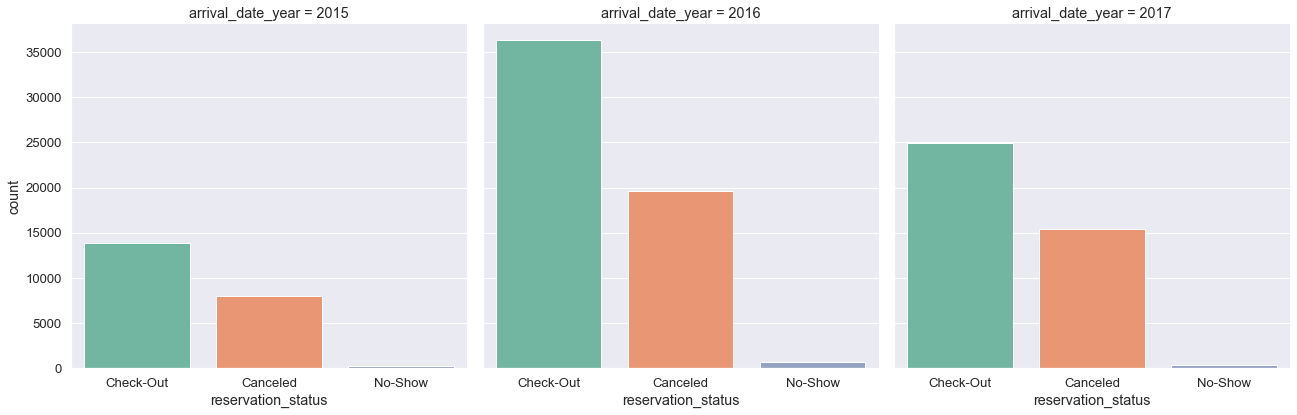

In [13]:
# Parameters
plt.rcParams['figure.figsize'] = [15, 7]
sns.set(style = 'darkgrid', font_scale = 1.2)

# catplot (countplot)
cat = sns.catplot(x = 'reservation_status', col = 'arrival_date_year', kind = 'count', data = hotel_data,
            height = 6, palette = 'Set2');

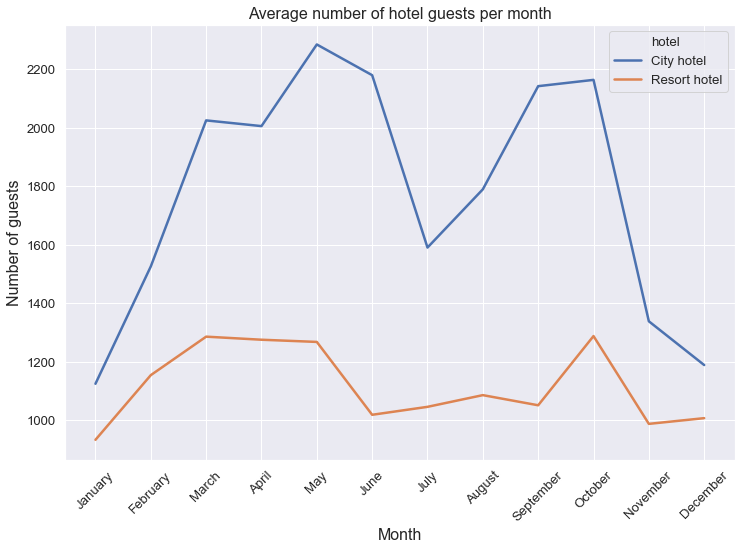

In [14]:
# We will now find to Average number of guests every month

# Create a DateFrame with the relevant data:
resort_monthly_guests = resort_hotel.groupby("arrival_date_month")["hotel"].count()
city_monthly_guests = city_hotel.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_monthly_guests.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_monthly_guests.values)})

city_guest_data = pd.DataFrame({"month": list(city_monthly_guests.index),
                    "hotel": "City hotel", 
                    "guests": list(city_monthly_guests.values)})
all_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
all_guest_data["month"] = pd.Categorical(all_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. We will Normalize data:
all_guest_data.loc[(all_guest_data["month"] == "July") | (all_guest_data["month"] == "August"),
                    "guests"] /= 3
all_guest_data.loc[~((all_guest_data["month"] == "July") | (all_guest_data["month"] == "August")),
                    "guests"] /= 2

# Line Chart to show the Average number of hotel guests per month:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=all_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

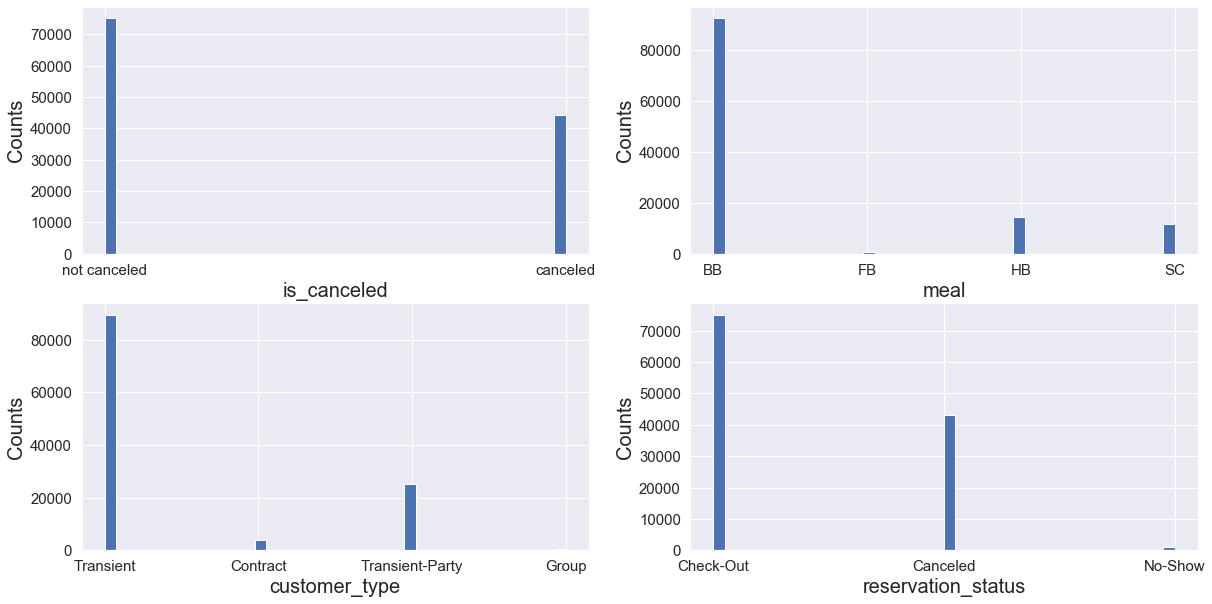

In [15]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# Specify the features of interest
num_features = ['is_canceled', 'meal', 'customer_type', 'reservation_status']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(hotel_data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
#plt.show()

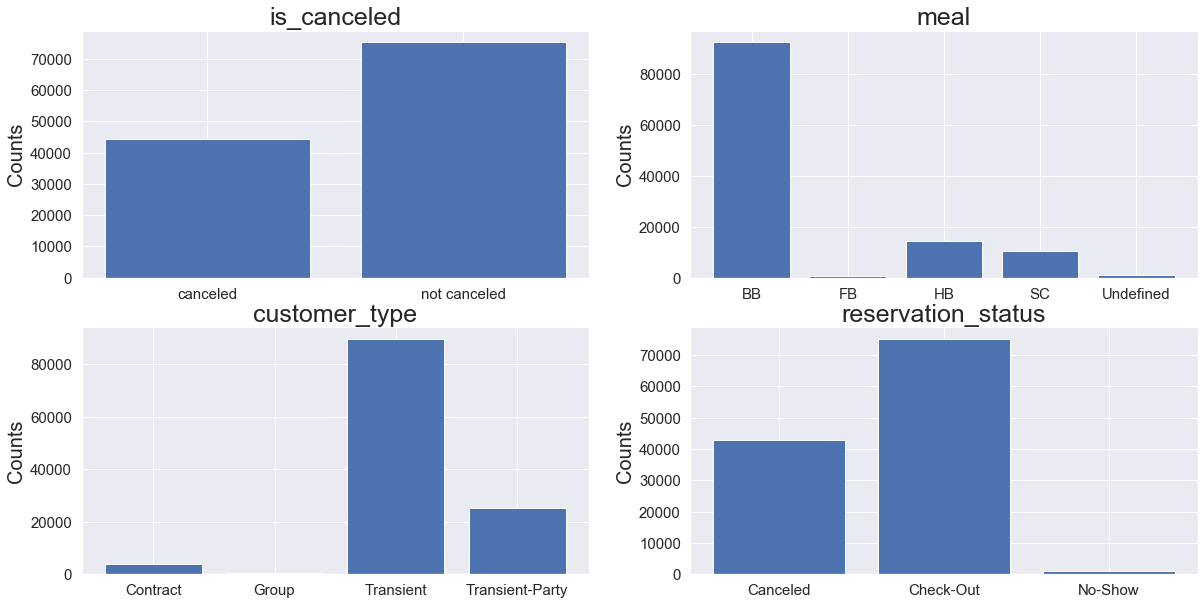

In [16]:
# Barcharts: set up the figure size

plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_is_canceled = data.replace({'is_canceled': {1: 'canceled', 0: 'not canceled'}}).groupby('is_canceled').size().reset_index(name='Counts')['is_canceled']
Y_is_canceled = data.replace({'is_canceled': {1: 'canceled', 0: 'not canceled'}}).groupby('is_canceled').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_is_canceled, Y_is_canceled)
axes[0, 0].set_title('is_canceled', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_meal = data.replace({'meal': {1: 'BB', 2: 'FB', 3: 'HB', 4: 'SC'}}).groupby('meal').size().reset_index(name='Counts')['meal']
Y_meal = data.replace({'meal': {1: 'BB', 2: 'FB', 3: 'HB', 4: 'SC'}}).groupby('meal').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_meal, Y_meal)
axes[0, 1].set_title('meal', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_customer_type = data.replace({'customer_type': {1: 'Transient', 2: 'Contract', 3: 'Transient-Party', 4: 'Group'}}).groupby('customer_type').size().reset_index(name='Counts')['customer_type']
Y_customer_type = data.replace({'customer_type': {1: 'Transient', 2: 'Contract', 3: 'Transient-Party', 4: 'Group'}}).groupby('customer_type').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_customer_type, Y_customer_type)
axes[1, 0].set_title('customer_type', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_reservation_status = data.replace({'reservation_status': {1: 'Check-Out', 2: 'Canceled', 3: 'No-Show'}}).groupby('reservation_status').size().reset_index(name='Counts')['reservation_status']
Y_reservation_status = data.replace({'reservation_status': {1: 'Check-Out', 2: 'Canceled', 3: 'No-Show'}}).groupby('reservation_status').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_reservation_status, Y_reservation_status)
axes[1, 1].set_title('reservation_status', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
#plt.show()

**Part 2 - Feature and Dimensionality Reduction**

In [17]:
# Update the data in is_canceled column, by changing value of canceled back to 1 and not canceled back to 0
hotel_data['is_canceled'].replace({'canceled': 1, 'not canceled': 0}, inplace = True)

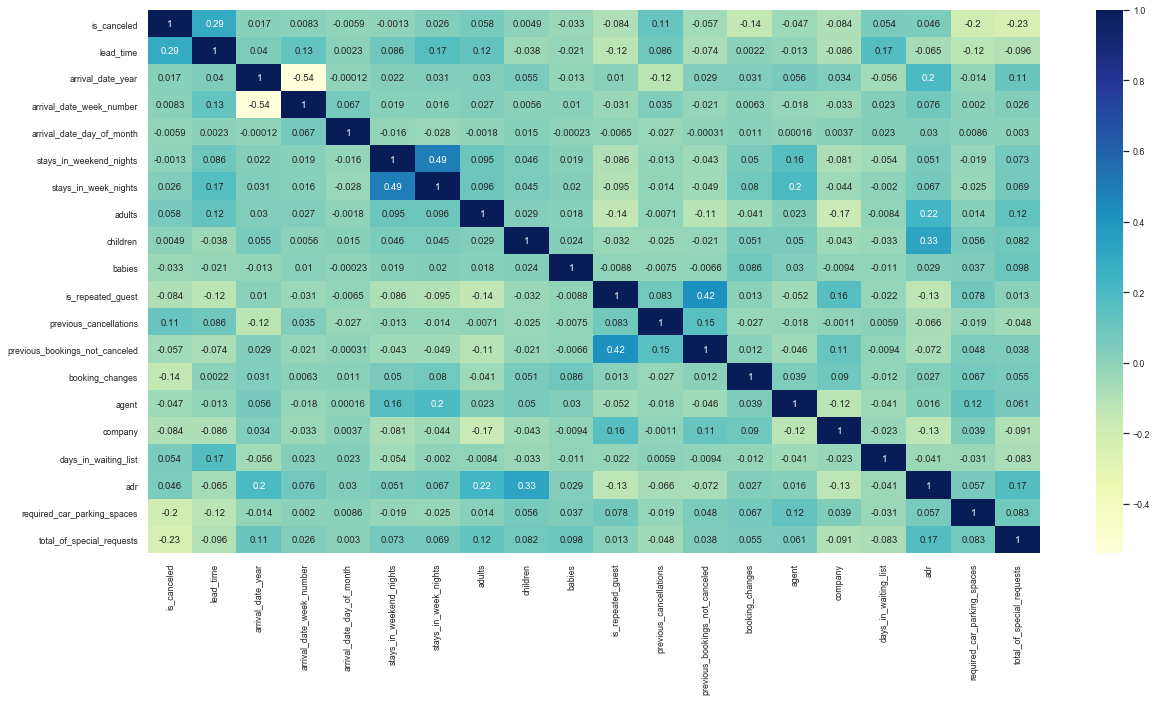

In [18]:
# Pearson Correlation Heatmap
plt.rcParams['figure.figsize'] == [18, 16]
sns.set(font_scale = 0.8)

sns.heatmap(hotel_data.corr(method = 'pearson'), annot = True, cmap = "YlGnBu");

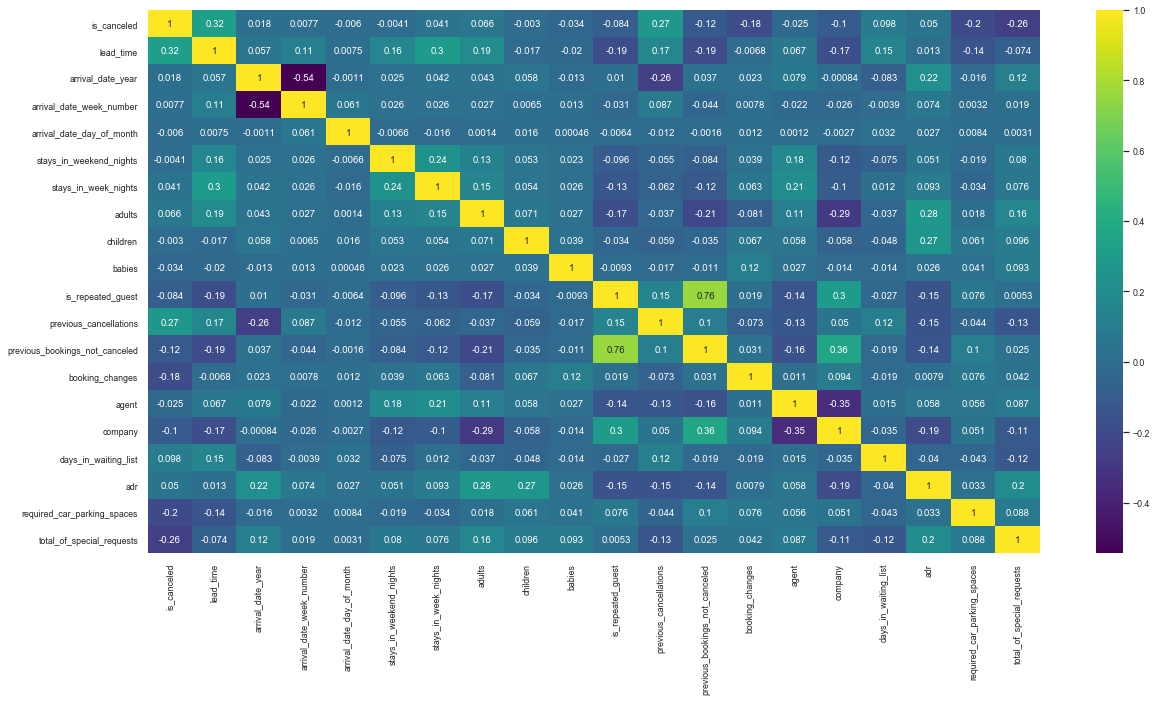

In [19]:
# Spearman Correlaton Heatmap
sns.heatmap(hotel_data.corr(method = 'spearman'), annot = True, cmap = "viridis");

In [20]:
#Replacing 0's with 1's in the adult column on the assumption that an adult must check in and use the room.
hotel_data['adults'].replace({0:1}, inplace=True) 

In [21]:
# As part of Feature reduction steps, I decided to create a new column with Total Guests instead of having 3 columns for adults, children and babies
hotel_data['total_guest'] = hotel_data['adults'] + hotel_data['children'] + hotel_data['babies']
hotel_data = hotel_data.drop(columns=['adults', 'children', 'babies'])

In [22]:
# Replacing NaN with a value of 1 since there should be a minimum of 1 guest
hotel_data['total_guest'].fillna(1, inplace = True)

In [23]:
# As part of Feature reduction steps, I decided to create a new column "arrival_date" instead of having 3 columns arrival_date_year, arrival_date_month and arrival_date_day_of_month

#Create a month numeric column to be used to create a DateTime
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,\
     'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
hotel_data['month'] = hotel_data.arrival_date_month.map(d)

#hotel_data = hotel_data.drop(columns=['year', 'month' , 'day', 'arrival_date_month'])

In [24]:
# Update the data in is_canceled column, by changing value of canceled back to 1 and not canceled back to 0
hotel_data['hotel'].replace({'City Hotel': 1, 'Resort Hotel': 0}, inplace = True)

In [25]:
# Update the data in deposit_type column, by changing value of No Deposit to 1, Non Refund to 2 and Refundable to 3
hotel_data['deposit_type'].replace({'No Deposit': 1, 'Non Refund': 2, 'Refundable': 3}, inplace = True)

In [26]:
# drop all the non-numeric fields
hotel_data_predict = hotel_data.drop(columns=['meal', 'country' , 'market_segment', 'distribution_channel', 'customer_type', 'reservation_status', 'reserved_room_type', 'assigned_room_type', 'arrival_date_month', 'reservation_status_date'])

In [27]:
# Train and test data
X=hotel_data_predict.drop(columns=["is_canceled"],axis="columns")
y=hotel_data_predict.is_canceled

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [29]:
X_train.shape

(95368, 20)

In [30]:
X_train

,hotel,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guest,month
8930,0,386,2016,43,20,1,3,0,0,0,0,1,0.0,0.0,0,49.00,0,0,2.0,10
85789,1,5,2016,12,19,2,1,0,0,0,0,1,1.0,0.0,0,93.33,0,0,2.0,3
17353,0,270,2015,40,28,3,7,0,0,0,0,1,95.0,0.0,0,52.00,0,0,2.0,9
101602,1,12,2016,46,11,2,2,0,0,0,0,1,7.0,0.0,0,86.40,0,3,2.0,11
67963,1,20,2017,19,10,0,2,0,0,0,2,1,0.0,452.0,0,110.00,0,0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76867,1,239,2015,42,17,0,1,0,1,0,0,2,1.0,0.0,0,60.00,0,0,2.0,10
110430,1,30,2017,17,27,0,1,0,0,0,1,1,9.0,0.0,0,124.00,0,1,1.0,4
103822,1,17,2016,53,30,0,2,0,0,0,0,1,9.0,0.0,0,138.00,0,2,2.0,12
860,0,130,2015,31,1,2,5,0,0,0,0,1,240.0,0.0,0,120.60,0,2,2.0,8


In [31]:
# Feature selection using Variance Threshold with threshold of 0.5
var = VarianceThreshold(threshold=.5)
var.fit(X_train,y_train)
X_train_var=var.transform(X_train)
X_test_var=var.transform(X_test)

In [32]:
X_train_var.shape

(95368, 14)

In [33]:
# Alternate way to perform feature selection and display the features
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [34]:
variance_threshold_selector(X_train, 0.5)

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,previous_cancellations,previous_bookings_not_canceled,agent,company,days_in_waiting_list,adr,total_of_special_requests,total_guest,month
8930,386,43,20,1,3,0,0,0.0,0.0,0,49.00,0,2.0,10
85789,5,12,19,2,1,0,0,1.0,0.0,0,93.33,0,2.0,3
17353,270,40,28,3,7,0,0,95.0,0.0,0,52.00,0,2.0,9
101602,12,46,11,2,2,0,0,7.0,0.0,0,86.40,3,2.0,11
67963,20,19,10,0,2,0,0,0.0,452.0,0,110.00,0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76867,239,42,17,0,1,1,0,1.0,0.0,0,60.00,0,2.0,10
110430,30,17,27,0,1,0,0,9.0,0.0,0,124.00,1,1.0,4
103822,17,53,30,0,2,0,0,9.0,0.0,0,138.00,2,2.0,12
860,130,31,1,2,5,0,0,240.0,0.0,0,120.60,2,2.0,8


In [35]:
varth_features=var.get_support()
varth_features

array([False,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True])

Variance threshold is calculated based on probability density function of a particular distribution. If a feature has 95% or more variability then is very close to zero and the feature may not help in the model prediciton and it can be removed. The values with True are the features selected using Variance threshold technique. The columns hotel, arrival_date_year, is_repeated_guest, booking_changes, deposit_type & required_car_parking_spaces are removed.

In [36]:
# Feature selection using SelectKBest feature selection
skbest = SelectKBest(k=10)
skbest.fit(X_train,y_train)
X_train_skbest=skbest.transform(X_train)
X_test_skbest=skbest.transform(X_test)

In [37]:
X_train_skbest.shape

(95368, 10)

In [38]:
kbest_features=skbest.get_support()
kbest_features

array([ True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False])

In [39]:
# SelectKBest to determine 10 best features
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(X_train,y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(10,'Score'))         # print 10 best features

                      Feature_Name         Score
11                    deposit_type  26849.743593
1                        lead_time   8917.683060
17       total_of_special_requests   5593.493295
16     required_car_parking_spaces   3730.453374
10                 booking_changes   2034.273401
0                            hotel   1810.499652
8           previous_cancellations   1184.390357
7                is_repeated_guest    668.337403
13                         company    651.244405
9   previous_bookings_not_canceled    312.704213


The values with True are the features selected using SelectKBest technique. Most relevant 10 features are selected. The features selected can be tested by running throught the model.

**Part 3 - Process of model evaluation and selection**

In [40]:
# calculate precision recall area under curve
def preci_auc(y_true, pred_prob):
   # calculate precision-recall curve
    p, r, _ = precision_recall_curve(y_true, pred_prob)
    # calculate area under curve
    return auc(r, p)

In [41]:
# Evaluate a model
def evaluate_model(X, y, model):
    # Define evaluation procedure
    CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Define the model evaluation the metric
    metric = make_scorer(preci_auc, needs_proba=True)
    # Evaluate model
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=CV, n_jobs=-1)
    return scores

In [42]:
# Define reference model
model = DummyClassifier(strategy='constant', constant=1)

In the Feature Selection part, Variance threshold had returned 14 features. I'll be using this training and test data for further process.

In [43]:
# define the reference model
model = DummyClassifier(strategy='constant', constant=1)
# Evaluate the model
scores = evaluate_model(X_train_var, y_train, model)
# summarize performance
print('Mean area under curve: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean area under curve: 0.500 (0.000)


From above, the baseline score is 0.50. Hence the model selected should be atleast above this score.

Since the values are of PCA transformation, it is better to normalize the data as it could impact the performance of the model.

In [44]:
# Normalize the input
scaler = StandardScaler()
scaler.fit(X_train_var)
X_train_norm = scaler.transform(X_train_var)
X_test_norm = scaler.transform(X_test_var)

Model selection - One of the common models is Logistic regression. Few other models are compared to see the results. Cross validation method is used.

In [45]:
def model_val(X, y, classifier, scor, show):
  X = np.array(X)
  y = np.array(y)

  scores = cross_val_score(classifier, X, y, scoring=scor)

  if show == True:
    print("Score: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
  
  return scores.mean()

In [46]:
# List of models
rfc = RandomForestClassifier()
ctc = DecisionTreeClassifier()
sglc = SGDClassifier()
lr = LogisticRegression()

model = []
score = []

# Check model score
for classifier in (rfc, ctc, sglc, lr):
    model.append(classifier.__class__.__name__)
    score.append(model_val(X_train_norm, y_train, classifier, scor='roc_auc', show=True))

pd.DataFrame(data=score, index=model, columns=['roc_auc'])

Score: 0.91 (+/- 0.00)
Score: 0.79 (+/- 0.00)
Score: 0.75 (+/- 0.01)
Score: 0.76 (+/- 0.00)


,roc_auc
RandomForestClassifier,0.913100
DecisionTreeClassifier,0.793645
SGDClassifier,0.750435
LogisticRegression,0.759874


As we can see from the summary table above, the best algorithm is Random Forest for this data set.\
In my upcoming week, I would like to test and validate my features using the above mentioned models

### Random Forest Model Evaluation

In [47]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

As the time taken to process the large dataset is more, just specified the number of estimators instead of hyperparameter grid search. 

In [48]:
parm_gridscv_rf = {'model__n_estimators': [75]}

In [49]:
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=parm_gridscv_rf, scoring='roc_auc', n_jobs=-1, 
                       pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [50]:
grid_rf.fit(X_train_norm, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                            

In [51]:
pd.DataFrame(grid_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.863114,4.807783,0.593706,0.189841,75,{'model__n_estimators': 75},0.916239,0.913181,0.913846,0.912057,0.909548,0.912974,0.002193,1


In [52]:
grid_rf.best_score_, grid_rf.best_params_

(0.9129743167008353, {'model__n_estimators': 75})

### Test Random Forest model

In [53]:
y_pred = grid_rf.predict(X_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score = grid_rf.predict_proba(X_test_norm)[:,1]
    except:
        y_score = grid_rf.decision_function(X_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))

Confusion Matrix
[[13946  1012]
 [ 2354  6530]] 

Classification report
              precision    recall  f1-score   support

           0    0.85558   0.93234   0.89232     14958
           1    0.86582   0.73503   0.79508      8884

    accuracy                        0.85882     23842
   macro avg    0.86070   0.83369   0.84370     23842
weighted avg    0.85940   0.85882   0.85608     23842

Scalar Metrics
        AUROC = 0.91734


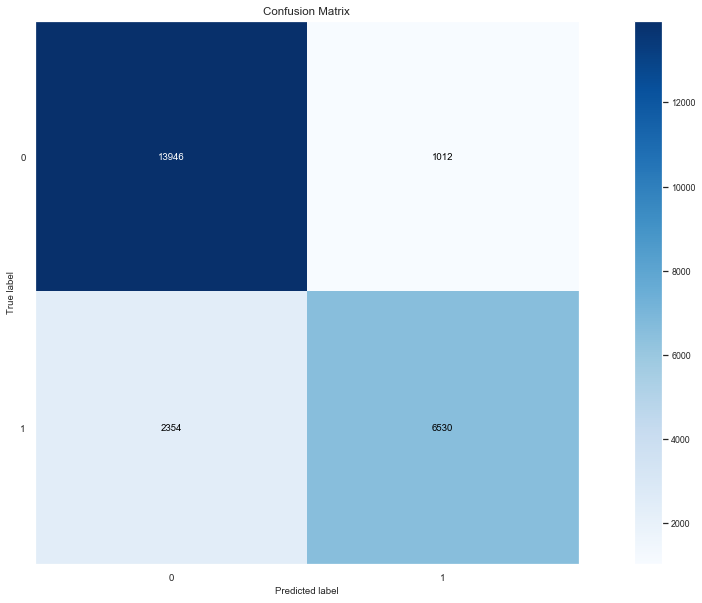

In [54]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [55]:
def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

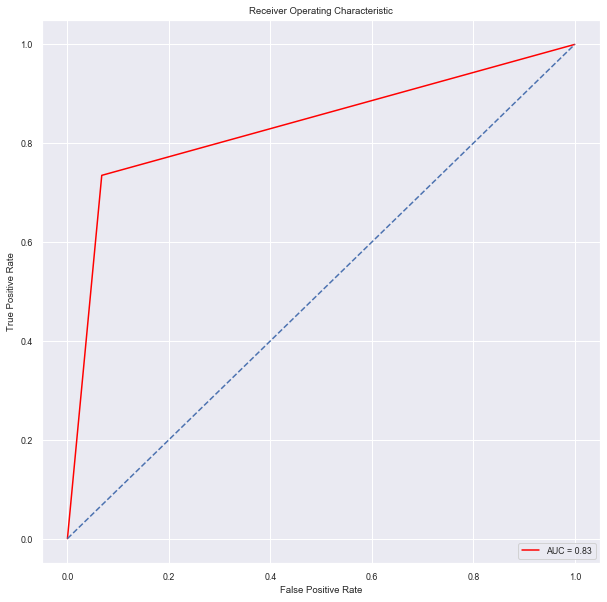

In [56]:
ROC(y_test, y_pred)

In [57]:
log_loss(y_test, y_pred)

4.876198747498898

### Logistic Regression Model Evaluation

In [58]:
# Logistic regression model with different C values
parameters = {
    'tol': [0.00001, 0.0001, 0.001],
    'C': [1, 50, 100]
}

lgr = GridSearchCV(LogisticRegression(random_state=101, n_jobs=1, max_iter=1000),
                     param_grid=parameters,
                     cv=3,
                     n_jobs=1,
                     scoring='roc_auc'
                    )
lgr.fit(X_train_norm, y_train)
clf = lgr.best_estimator_

print(lgr.best_estimator_)
print("The best classifier score:",lgr.best_score_)

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=1, penalty='l2', random_state=101,
                   solver='lbfgs', tol=1e-05, verbose=0, warm_start=False)
The best classifier score: 0.7597565062708697


### Test Logistic Regression Model

In [59]:
y_pred1 = clf.predict(X_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred1), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred1, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score1 = clf.predict_proba(X_test_norm)[:,1]
    except:
        y_score1 = clf.decision_function(X_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score1)))

Confusion Matrix
[[13364  1594]
 [ 5093  3791]] 

Classification report
              precision    recall  f1-score   support

           0    0.72406   0.89343   0.79988     14958
           1    0.70399   0.42672   0.53136      8884

    accuracy                        0.71953     23842
   macro avg    0.71403   0.66008   0.66562     23842
weighted avg    0.71658   0.71953   0.69982     23842

Scalar Metrics
        AUROC = 0.76038


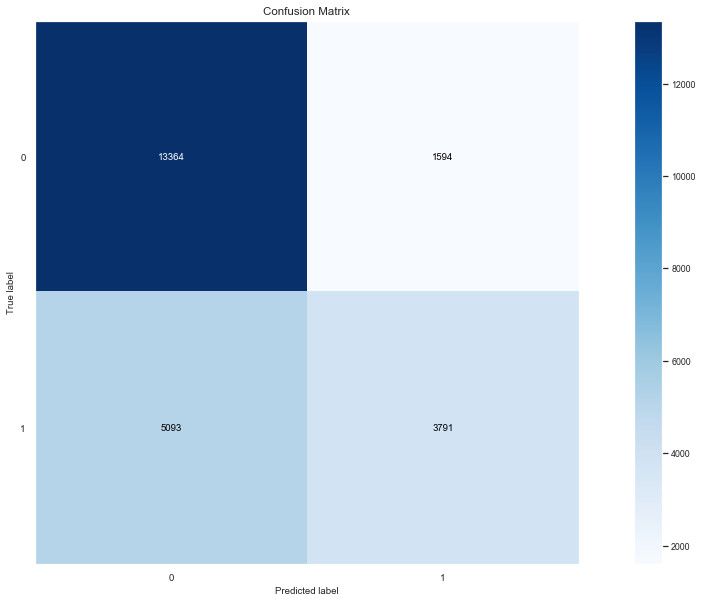

In [60]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred1)

In [61]:
log_loss(y_test, y_pred1)

9.687193704851584

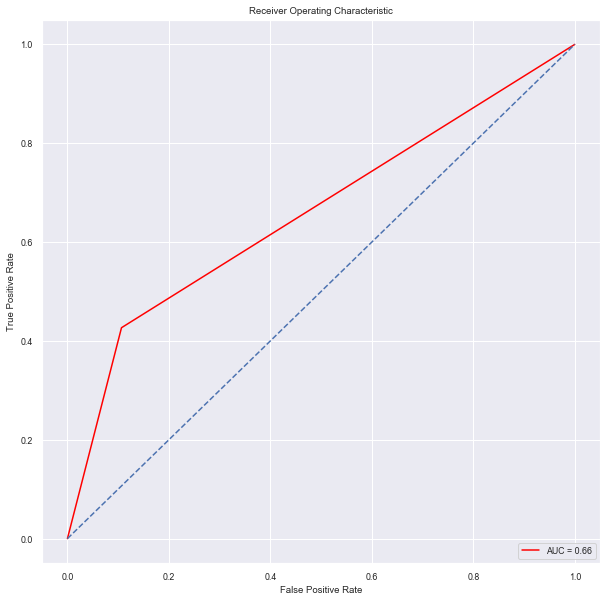

In [62]:
ROC(y_test, y_pred1)

Based on the above observation:\
lead_time is the most importance feature! This means that the sooner the reservation is made compared to arrival time, the more likely it will be cancelled.\
Comparing the Random Forest model and Logistic Regression model I think Random Forest model is much better with this dataset than Logistic Regression mode. In the confusion matrix the random forest predicts the values for both classes more accurately than the logistic regression confusion matrix.\
The LogisticRegression model predicted the 1,594 Not Canceled bookings as Canceled bookings and 5,093 canceled bookings as Not Canceled.\
The RandomForestClassifier model predicted the 1,012 Not Canceled bookings as Canceled bookings and 2,354 canceled bookings as Not Canceled.\
In the precision recall and F1 score the Random forest model scored better on all three metrics for both classes. In the ROC AUC curve the random forest preforms much better. Overall the Random Forest model out preforms the logistic regression model on every point.

Hotel Owners can surely use the Random Forest model to predict about a booking.\